In [1]:
# Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random

sns.set(style="whitegrid")

In [2]:
# Dataset
DATASET_PATH = "drive/My Drive/fruit_freshness_dataset/Data"

In [3]:
# Detect Classes
class_paths = []
class_labels = []

for fruit in os.listdir(DATASET_PATH):
  fruit_path = os.path.join(DATASET_PATH, fruit)
  if os.path.isdir(fruit_path):
    for status in os.listdir(fruit_path):
      status_path = os.path.join(fruit_path, status)
      if os.path.isdir(status_path):
        class_paths.append(status_path)
        class_labels.append(f"{fruit}_{status}")

print("Detected Classes:")
for label in class_labels:
  print(label)

Detected Classes:
Banana_Rotten
Banana_Fresh
Strawberry_Rotten
Strawberry_Fresh
Apple_Rotten
Apple_Fresh


/tmp/ipython-input-1148761097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


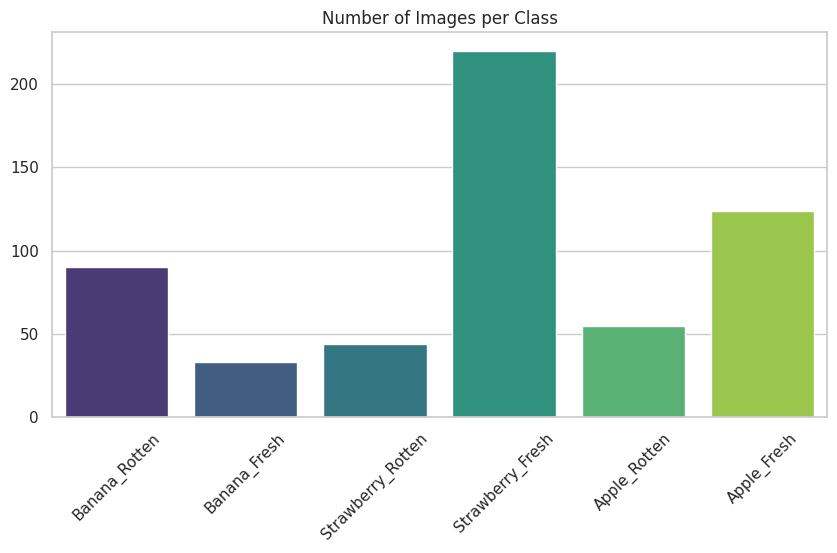

In [4]:
# Class Distribution
class_counts = {label: len(os.listdir(path)) for label, path in zip(class_labels, class_paths)}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Number of Images per Class")
plt.xticks(rotation=45)
plt.show()

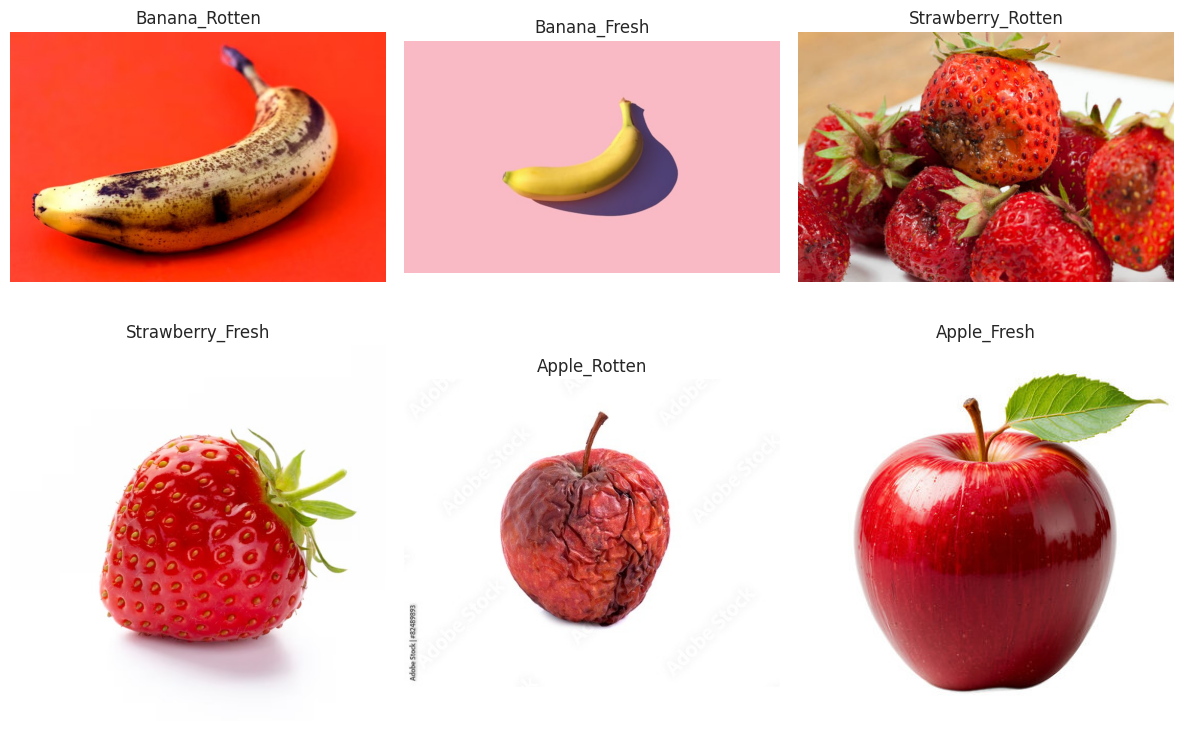

In [5]:
# Display random images
plt.figure(figsize=(12, 8))
i = 1
for path, label in zip(class_paths, class_labels):
  img_name = random.choice(os.listdir(path))
  img = Image.open(os.path.join(path, img_name))
  plt.subplot(2, 3, i)
  plt.imshow(img)
  plt.title(label)
  plt.axis("off")
  i += 1
plt.tight_layout()
plt.show()

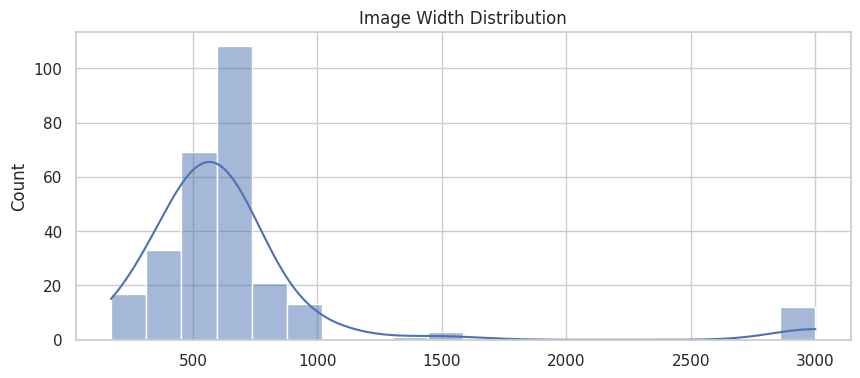

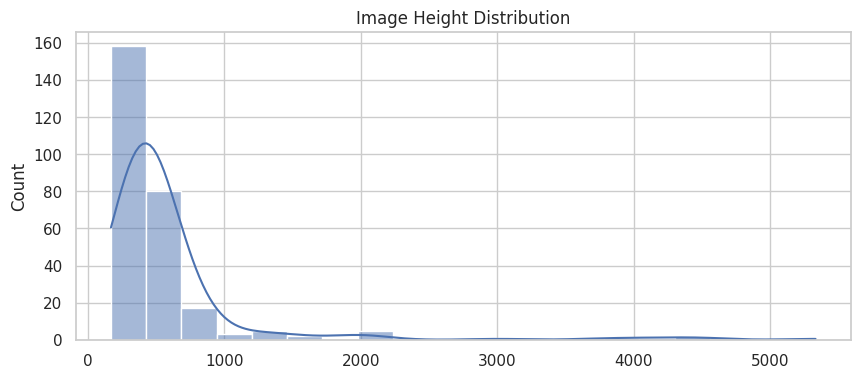

In [6]:
# Image size analysis
widths, heights = [], []

for path in class_paths:
  for img_name in os.listdir(path)[:50]: # Sample to speed up
    img = Image.open(os.path.join(path, img_name))
    w, h = img.size
    widths.append(w)
    heights.append(h)

plt.figure(figsize=(10, 4))
sns.histplot(widths, bins=20, kde=True)
plt.title("Image Width Distribution")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(heights, bins=20, kde=True)
plt.title("Image Height Distribution")
plt.show()

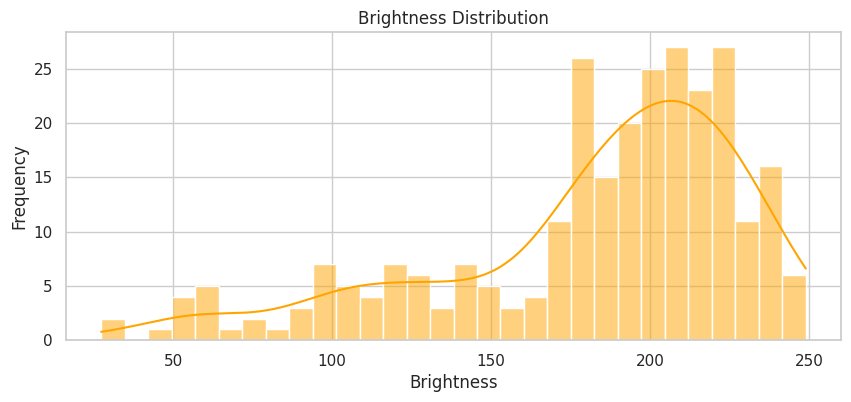

In [7]:
# Brightness distribution
brightness_values = []

for path in class_paths:
  for img_name in os.listdir(path)[:50]:
    img = Image.open(os.path.join(path, img_name))
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    brightness_values.append(np.mean(gray))

plt.figure(figsize=(10, 4))
sns.histplot(brightness_values, bins=30, kde=True, color="orange")
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()

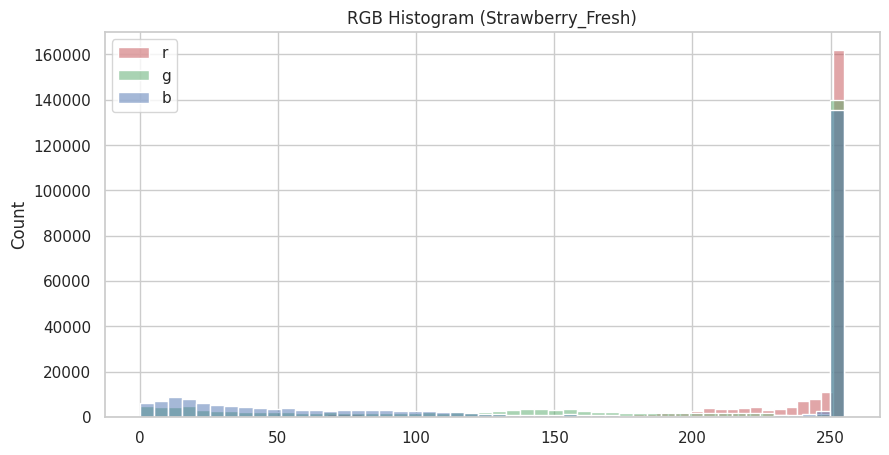

In [8]:
# Color histogram (RGB) of sample image
sample_path = random.choice(class_paths)
sample_img = random.choice(os.listdir(sample_path))
img = cv2.imread(os.path.join(sample_path, sample_img))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
colors = ("r", "g", "b")
for i, color in enumerate(colors):
  hist = img_rgb[:,:,i].flatten()
  sns.histplot(hist, bins=50, color=color, label=color, alpha=0.5)
plt.title(f"RGB Histogram ({sample_path.split('/')[-2]}_{sample_path.split('/')[-1]})")
plt.legend()
plt.show()

Shape of X: (233, 12288)
Number of labels: 233


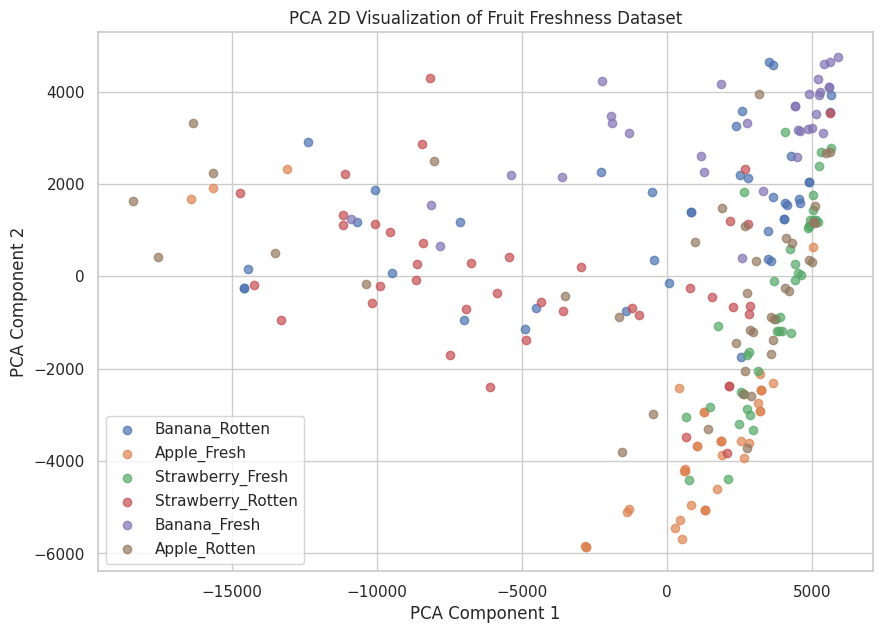

In [9]:
# PCA 2D visualisation
X = []
y = []

for path, label in zip(class_paths, class_labels):
  for img_name in os.listdir(path)[:40]: # Limit to speed up
    img_path = os.path.join(path, img_name)
    img = Image.open(img_path).convert('RGB') # Force RGB
    img = img.resize((64,64))
    X.append(np.array(img).flatten())
    y.append(label)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print("Shape of X:", X.shape)
print("Number of labels:", len(y))

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA result
plt.figure(figsize=(10,7))
for label in set(y):
  idx = np.where(y == label)
  plt.scatter(X_pca[idx,0], X_pca[idx,1], label=label, alpha=0.7)
plt.title("PCA 2D Visualization of Fruit Freshness Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

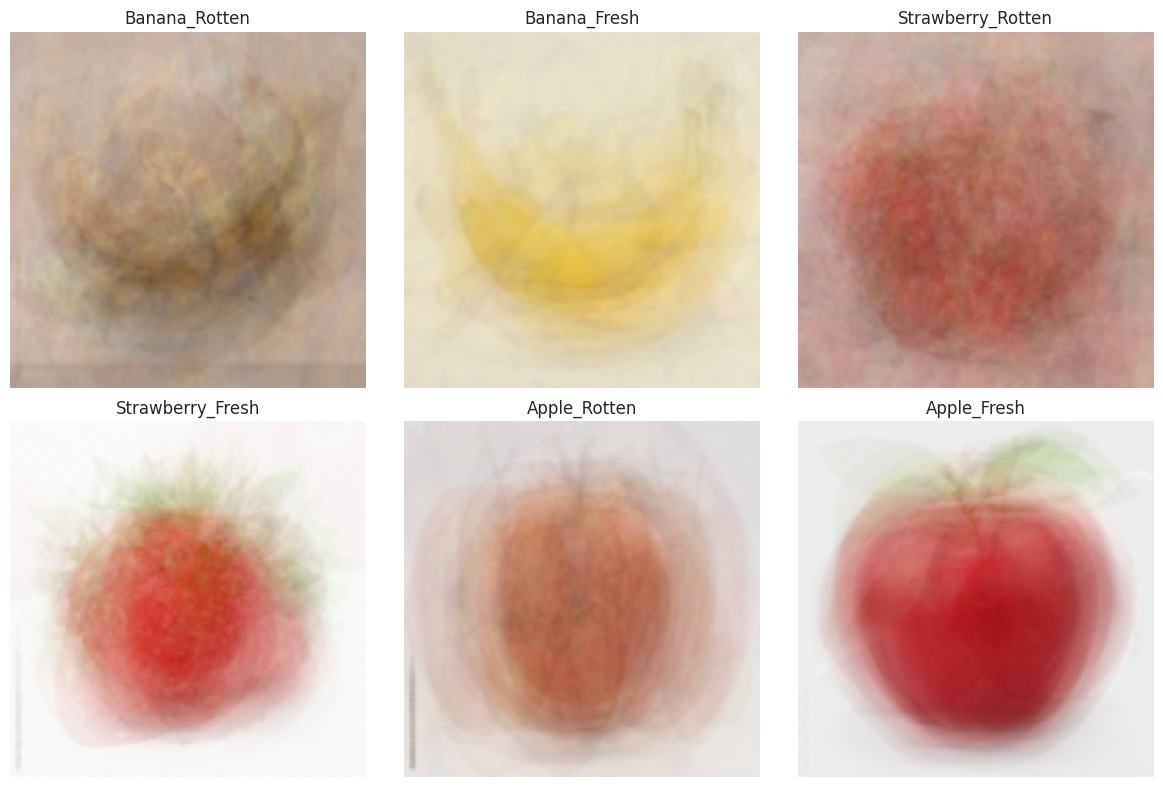

In [12]:
plt.figure(figsize=(12,8))

for i, (path, label) in enumerate(zip(class_paths, class_labels)):
  imgs = []

  # Limit number of images to reduce blur
  sample_imgs = random.sample(os.listdir(path), min(len(os.listdir(path)), 30))

  for img_name in sample_imgs:
    img_path = os.path.join(path, img_name)
    img = Image.open(img_path).convert('RGB') # Force RGB
    img = img.resize((128,128)) # Uniform size
    imgs.append(np.array(img))

  # Stack and compute average
  avg_img = np.mean(np.stack(imgs, axis=0), axis=0).astype("uint8")

  # Plot
  plt.subplot(2,3,i+1)
  plt.imshow(avg_img)
  plt.title(label)
  plt.axis("off")

plt.tight_layout()
plt.show()